In [40]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, how= 'left', on='city')

# Display the data table for preview
combined_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/18 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/18 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/18 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/18 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/18 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/18 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/18 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/18 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/18 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/18 6:26,42.81,5.327640e+12,33,Urban


## Bubble Plot of Ride Sharing Data

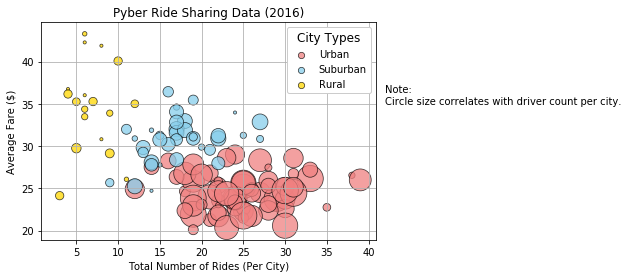

In [41]:
# Build the scatter plots for each city types

city_type = ["Urban", "Suburban", "Rural"]
city_color = ["lightcoral", "skyblue", "gold"]

for city in range(len(city_type)):

    city_grp_df = combined_df.set_index("type").loc[city_type[city],:].groupby(["city"])

    total_ride = city_grp_df["city"].value_counts()

    avg_fare = city_grp_df["fare"].mean()

    total_drivers =  city_grp_df["driver_count"].mean()
    
    plt.scatter(total_ride, avg_fare, s=(total_drivers*10), 
                facecolor=city_color[city], edgecolor="black",
                alpha = 0.75, linewidth = 0.75)
    
# Create a legend
legend = plt.legend(city_type, loc="best", framealpha=1)
legend.set_title("City Types",prop={"size":"large"})
                                 
for y in range(len(city_type)):
    legend.legendHandles[y]._sizes = [40]

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/Pyber_RideSharing_Bubbleplot.png", dpi=180, bbox_inches="tight")

## Total Fares by City Type

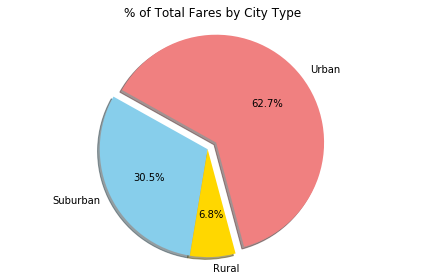

In [42]:
# Calculate Type Percents
total_fares = [0,0,0]
explode = (0.1, 0, 0)

for city in range(len(city_type)):
    city_fares_df = combined_df.set_index("type").loc[city_type[city],:]
    total_fares[city] = city_fares_df["fare"].sum()

# Build Pie Chart
plt.pie(total_fares, explode=explode, labels=city_type, colors=city_color,
        autopct="%1.1f%%", shadow=True, startangle=285)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.tight_layout()

# Save Figure
plt.savefig("Images/Fares_by_City_Pie.png", dpi=180, bbox_inches="tight")

# Show Figure
plt.show()

## Total Rides by City Type

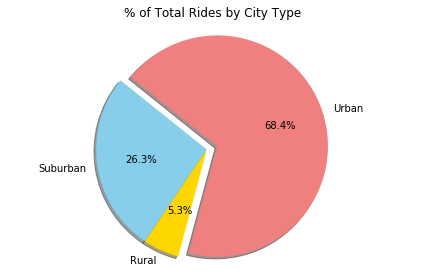

In [43]:
# Calculate Ride Percents
city_rides = [0,0,0]
explode = (0.1, 0, 0)

for city in range(len(city_type)):
    city_rides_df = combined_df.set_index("type").loc[city_type[city],:]
    city_rides[city] = city_rides_df["city"].count()
    
# Build Pie Chart
plt.pie(city_rides, explode=explode, labels=city_type, colors=city_color,
        autopct="%1.1f%%", shadow=True, startangle=255)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.tight_layout()

# Save Figure
plt.savefig("Images/Rides_by_City_Pie.png", dpi=180, bbox_inches="tight")

# Show Figure
plt.show()

## Total Drivers by City Type

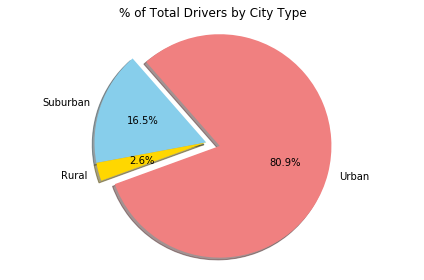

In [44]:
# Calculate Driver Percents
drivers = [0,0,0]
explode = (0.125, 0, 0)

for city in range(len(city_type)):
    drivers_df = city_data_df.set_index("type").loc[city_type[city],:]
    drivers[city] = drivers_df["driver_count"].sum()

# Build Pie Charts
plt.pie(drivers, explode=explode, labels=city_type, colors=city_color,
        autopct="%1.1f%%", shadow=True, startangle=200)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.tight_layout()

# Save Figure
plt.savefig("Images/Drivers_by_City_Pie.png", dpi=180, bbox_inches="tight")

# Show Figure
plt.show()

# TREND OBSERVATIONS

1.) Urban cities dominate the rideshares total number of rides per city, but is generally commanding a lower average fare than Suburban and Rural cities

2.) Based on the data we can infer that the large percentage of drivers (80.9%) work in the Urban cities due to the number of rides available to them there (68.4% of rides)

3.) The percentage of rides in rural cities doubles the percentage of avaiable drivers, and suburban drivers are slightly less than 10% lower in percentage of drivers (16.5%) to the percentage of ride in suburban cities (26.3%), city_typewhereas we can infer that there are more available drivers by percentage (80.9%) than rides (68.4%) in Urban areas